In [1]:
import numpy as np

In [2]:
rand = np.random.RandomState(42)

In [3]:
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [6]:
# how to access 3 indices?

# first option
opt1 = [x[3], x[5], x[7]]
print(opt1)

# or create an array of indices
ind = [3, 5, 7]
opt2 = x[ind]
print(opt2)

[71, 20, 86]
[71 20 86]


In [8]:
opt2.shape

(3,)

In [9]:
# also applies to multidimensional arrays
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [16]:
X[row[:, np.newaxis]]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [20]:
X[row[:, np.newaxis], 2]

array([[ 2],
       [ 6],
       [10]])

In [14]:
# broadcasting applies
# we can combine column vector with row vector within indices 
# to get 2d result
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

#### Combining Indexing Methods

In [22]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [23]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [24]:
X[1:, ::-1]

array([[ 7,  6,  5,  4],
       [11, 10,  9,  8]])

In [26]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

#### An Example

In [27]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [ ]:
X[:, 0]

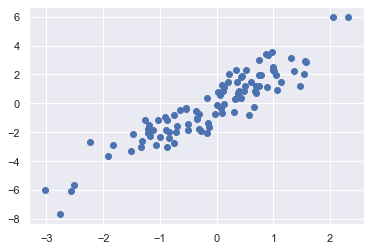

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

x = X[:, 0]
y = X[:, 1]
plt.scatter(x, y);

In [32]:
# using random indexing to select 20 random point
indices = np.random.choice(X.shape[0], 20, replace=False)

In [38]:
# random selection
selection = X[indices]
selection.shape

(20, 2)

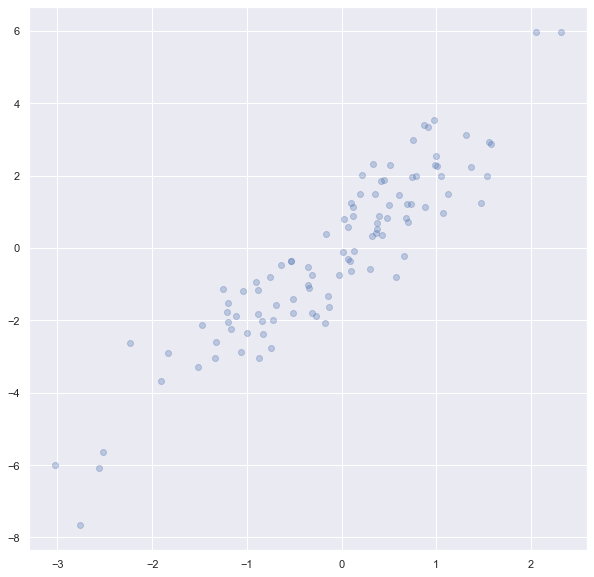

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(x, y, alpha=0.3)

selected_x = selection[:, 0]
selected_y = selection[:, 1]
plt.scatter(selected_x, selected_y, facecolor='none', s=200);

#### Modifying Values with Indexing

In [44]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [45]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [47]:
# notice how the 6 overrides the 4
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [48]:
# another example
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

#### Example Binning Data

In [49]:
np.random.seed(42)

x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [50]:
# find the appropriate bin for each x value
i = np.searchsorted(bins, x)

In [55]:
# counts now reflects number of points within each bin
np.add.at(counts, i, 1)

/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """Entry point for launching an IPython kernel.


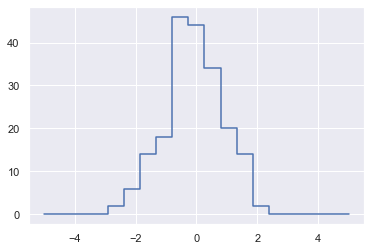

In [56]:
plt.plot(bins, counts, linestyle='steps')

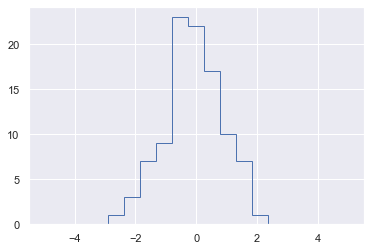

In [58]:
plt.hist(x, bins, histtype='step');

In [59]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
19.9 µs ± 218 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
13.3 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
